In [1]:
import os
import numpy as np
import random
import logging
from itertools import combinations
from typing import Dict, Tuple, List
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Import custom functions from Metabackbone_functions and ER_functions modules
from Metabackbone_functions import (
    load_dna_structure_files, find_longest_strand, find_cross_over_in_longest_strand,
    calculate_left_right_pos, find_valid_point, find_bases_around_point,
    calculate_center_of_mass, calculate_bend_angle, find_bend_angle,
    find_bases_in_sphere, remove_three_strands_in_sphere, export_dna_structures,
    run_all_simulations, stored_removed_strands, remove_one_strand_in_sphere
)

from ipy_oxdna.dna_structure import DNAStructure, DNAStructureStrand, load_dna_structure, DNABase, strand_from_info
from ipy_oxdna.oxdna_simulation import Simulation, SimulationManager

from Evolutionary_functions import (
    run_simulations_for_structure, load_simulated_structure, evaluate_fitness, check_dna_structure,
    create_index_position_map, get_indexes_from_positions,update_right_left_indexes,
    find_symmetric_strands, remove_symmetric_strands_in_sphere, find_multiple_symmetric_strand_collections
)

In [2]:
left_indices = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070,2071,2072,2073,2074,2075,2076,2077,2078,2079,2080,2081,2082,2083,2084,2085,2086,2087,2088,2089,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100,2101,2102,2103,2104,2105,2106,2107,2108,2109,2110,2111,2112,2113,2114,2115,2116,2117,2118,2119,2120,2121,2122,2123,2124,2125,2126,2127,2128,2129,2130,2131,2132,2133,2134,2135,2136,2137,2138,2139,2140,2141,2142,2143,2144,2145,2146,2147,2148,2149,2150,2151,2152,2153,2154,2155,2156,2157,2158,2159,2160,2161,2162,2163,2164,2165,2166,2167,2168,2169,2170,2171,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181,2182,2183,2184,2185,2186,2187,2188,2189,2190,2191,2192,2193,2194,2195,2196,2197,2198,2199,2200,2201,2202,2203,2204,2205,3269,3270,3271,3272,3273,3274,3275,3276,3277,3278,3279,3280,3281,3282,3283,3284,3285,3296,3302,3303,3304,3305,3306,3307,3308,3309,3310,3311,3312,3313,3314,3315,3316,3317,3318,3319,3320,3321,3322,3323,3324,3325,3326,3327,3328,3329,3330,3331,3332,3333,3334,3335,3336,3337,3338,3339,3340,3341,3342,3343,3344,3345,3346,3347,3348,3349,3350,3351,3352,3353,3354,3355,3356,3357,3358,3359,3360,3361,3362,3363,3364,3365,3366,3367,3368,3369,3370,3371,3372,3373,3374,3375,3376,3377,3378,3379,3380,3381,3382,3383,3384,3385,3386,3387,3388,3389,3390,3391,3392,3393,3394,3395,3396,3397,3398,3399,3400,3401,3402,3403,3404,3405,3406,3407,3408,3409,3410,3411,3412,3413,3414,3415,3416,3417,3418,3419,3420,3421,3422,3423,3424,3425,3426,3427,3428,3429,3430,3431,3432,3433,3434,3435,3436,3437,3438,3439,3440,3441,3442,3443,3444,3445,3446,3447,3448,3449,3450,3451,3452,3453,3454,3455,3456,3457,3458,3459,3460,3461,3462,3463,3464,3465,3466,3467,3468,3469,3470,3471,3472,3473,3474,3475,3476,3477,3478,3479,3480,3481,3482,3483,3484,3485,3486,3487,3488,3489,3490,3491,3492,3493,3494,3495,3496,3497,3498,3499,3500,3501,3502,3503,3504,3505,3506,3507,3508,3509,3510,3511,3512,3513,3514,3515,3516,3517,3518,3519,3520,3521,3522,3523,3524,3525,3526,3527,3528,3529,3530,3531,3532,3533,3534,3535,3536,3537,3538,3539,3540,3541,3542,3543,3544,3545,3546,3547,3548,3549,3550,3551,3552,3553,3554,3555,3556,3557,3558,3559,4066,4101,4102,4103,4104,4105,4106,4107,4108,4109,4110,4111,4112,4113,4114,4115,4116,4117,4118,4119,4120,4121,4122,4123,4124,4125,4126,4127,4128,4129,4130,4131,4132,4133,4134,4135,4136,4137,4138,4139,4140,4141,4142,4143,4144,4145,4146,4147,4148,4149,4150,4151,4152,4153,4154,4155,4156,4157,4158,4159,4160,4161,4162,4163,4164,4165,4166,4167,4168,4169,4170,4171,4172,4173,4174,4175,4176,4177,4178,4179,4180,4181,4182,4183,4184,4185,4186,4187,4188,4189,4190,4191,4192,4193,4194,4195,4196,4197,4198,4199,4200,4201,4202,4203,4204,4205,4469,4470,4471,4472,4473,4474,4475,4479,4480,4481,4482,4483,4484,4485,4486,4487,4488,4489,4490,4491,4492,4493,4494,4495,4496,4497,4498,4499,4500,4501,4502,4503,4504,4505,4506,4507,4508,4509,4510,4511,4512,4513,4514,4515,4516,4517,4518,4519,4520,4521,4522,4523,4524,4525,4526,4527,4528,4529,4530,4531,4532,4533,4534,4535,4536,4537,4538,4539,4540,4541,4542,4543,4544,4545,4546,4547,4548,4549,4550,4551,4552,4553,4554,4555,4556,4557,4558,4559,4560,4561,4562,4563,4564,4565,4566,4567,4568,4569,4570,4571,4572,4573,4574,4575,4576,4577,4578,4579,4580,4581]
right_indices = [20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1285,1286,1287,1288,1289,1290,1291,1292,1293,1294,1295,1296,1297,1298,1299,1300,1301,1302,1303,1304,1305,1306,1307,1308,1309,1310,1311,1312,1313,1314,1315,1316,1317,1318,1319,1320,1321,1322,1323,1324,1325,1326,1327,1328,1329,1330,1331,1332,1333,1334,1335,1336,1337,1338,1339,1340,1341,1342,1343,1344,1345,1346,1347,1348,1349,1350,1351,1352,1353,1354,1355,1356,1357,1358,1359,1360,1361,1362,1363,1364,1365,1366,1367,1368,1369,1370,1371,1372,1373,1374,1375,1376,1377,1378,1379,1380,1381,1382,1383,1384,1385,1386,1387,1388,1389,1390,1391,1392,1393,1394,1395,1396,1397,1398,1399,1400,1401,1402,1403,1404,1405,1406,1407,1408,1409,1410,1411,1412,1413,1414,1415,1416,1417,1418,1419,1420,1421,1422,1423,1424,1425,1426,1427,1428,1429,1430,1431,1432,1433,1434,1435,1436,1676,1677,1678,1679,1680,1681,1682,1683,1684,1685,1686,1687,1688,1689,1690,1691,1692,1693,1694,1695,1696,1697,1698,1699,1700,1701,1702,1703,1704,1705,1706,1707,1708,1709,1710,1711,1712,1713,1714,1715,1716,1717,1718,1719,1720,1721,1722,1723,1724,1725,1726,1727,1728,1729,1730,1731,1732,1733,1734,1735,1736,1737,1738,1739,1740,1741,1742,1743,1744,1745,1746,1747,1748,1749,1750,1751,1752,1753,1754,1755,1756,1757,1758,1759,1760,1761,1762,1763,1764,1765,1766,1767,1768,1769,1770,1771,1772,1773,1774,1775,1776,1777,1778,1779,1780,1781,1782,1783,1784,1785,1786,1787,1788,1789,1790,1791,1792,1793,1794,1795,1796,1797,1798,2312,2313,2314,2315,2316,2317,2318,2319,2320,2321,2322,2323,2324,2325,2326,2327,2328,2329,2330,2331,2332,2333,2334,2335,2336,2337,2338,2339,2340,2341,2342,2343,2344,2345,2346,2347,2348,2349,2350,2351,2352,2353,2354,2355,2356,2357,2358,2359,2360,2361,2362,2363,2364,2365,2366,2367,2368,2369,2370,2371,2372,2373,2374,2375,2376,2377,2378,2379,2380,2381,2382,2383,2384,2385,2386,2387,2388,2389,2390,2391,2392,2393,2394,2395,2396,2397,2398,2399,2400,2401,2402,2403,2404,2405,2406,2407,2408,2409,2410,2411,2412,2413,2414,2415,2416,2417,2418,2419,2420,2421,2422,2423,2424,2425,2426,2427,2428,2429,2430,2431,2432,2433,2434,2435,2436,2437,2438,2439,2440,2441,2442,2443,2444,2445,2446,2447,2448,2449,2450,2451,2452,2453,2454,2455,2456,2457,2458,2459,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500,2501,2513,2514,2515,2516,2517,2518,2519,2520,2521,2522,2523,2524,2527,2528,2529,2530,2531,2532,2533,3560,3561,3562,3563,3564,3565,3566,3567,3568,3569,3570,3571,3572,3573,3574,3575,3576,3577,3578,3579,3580,3581,3582,3583,3584,3585,3586,3587,3588,3589,3590,3591,3592,3593,3594,3595,3596,3597,3598,3599,3600,3601,3602,3603,3604,3605,3606,3607,3608,3609,3610,3611,3612,3613,3614,3615,3616,3617,3618,3619,3620,3621,3622,3623,3624,3625,3626,3627,3628,3629,3630,3631,3632,3633,3634,3635,3636,3637,3638,3639,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649,3650,3651,3652,3653,3654,3655,3656,3657,3658,3659,3660,3661,3662,3663,3664,3665,3666,3667,3668,3669,3670,3671,3672,3673,3674,3675,3676,3677,3678,3679,3680,3682,3683,3684,3685,3686,3687,3688,3689,3690,3691,3692,3693,3694,3695,3696,3697,3698,3699,3700,3701,3702,3703,3704,3705,3706,3707,3708,3709,3710,3711,3712,3713,3714,3715,3750,4206,4207,4208,4209,4210,4211,4212,4213,4214,4215,4216,4217,4218,4219,4220,4221,4222,4223,4224,4225,4226,4227,4228,4229,4230,4231,4232,4233,4234,4235,4236,4237,4238,4239,4240,4241,4242,4243,4244,4245,4246,4247]
sphere_radius = 3.0
eq_steps = 1e3
prod_steps = 1e3
rel_steps = 1e2
min_distance_threshold = 2.5
min_distance = 7.0
max_distance = 20.0
num_best_structures = 1
num_iterations = 2
sphere_radius = 3.0
desired_angle = 150.0
tolerance = 5.0

input_path = "/home/ava/MetaBackbone_project/Metabackbone-scripts/structure_files/six_helix_oxdna_file/unmodified/1512_bp"
base_path = "/home/ava/MetaBackbone_project/Metabackbone-scripts/structure_files/six_helix_oxdna_file/modified/1512_bp"
sim_base_path = '/home/ava/MetaBackbone_project/Metabackbone-scripts/Notebook/Simulations_results/simulated_structures/1512_bp'

eq_parameters = {'dt':f'0.003','steps':f'{eq_steps}','print_energy_every': f'1e5', 'interaction_type': 'DNA2',
                 'print_conf_interval':f'1e5', 'fix_diffusion':'false', 'T':f'20C','max_density_multiplier':f'50'}

prod_parameters = {'dt':f'0.003','steps':f'{prod_steps}','print_energy_every': f'1e5', 'interaction_type': 'DNA2',
                   'print_conf_interval':f'1e5', 'fix_diffusion':'false', 'T':f'20C','max_density_multiplier':f'50'}
rel_parameters = {'steps': f'{rel_steps}', 'max_backbone_force': '200', 'max_backbone_force_far': '200'}

In [3]:
def plot_best_vs_desired_angle(angle_history, desired_angle):
    import matplotlib.pyplot as plt

    best_angles = [min(angles) for angles in angle_history]

    plt.figure(figsize=(8, 6))
    plt.scatter(range(1, len(angle_history) + 1), best_angles, color='blue', label='Best Angle')
    plt.axhline(y=desired_angle, color='red', linestyle='dashed', label='Desired Angle')
    plt.xlabel('Iteration')
    plt.ylabel('Angle (degrees)')
    plt.title('Best Angle vs. Desired Angle Over Iterations')
    plt.legend()
    plt.grid(True)
    plt.show()


In [4]:
def plot_angle_evolution(angle_history, desired_angle):
   
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(angle_history) + 1), [min(angles) for angles in angle_history], marker='o', color='blue')
    plt.axhline(y=desired_angle, color='red', linestyle='dashed', label='Desired Angle')
    plt.xlabel('Iteration')
    plt.ylabel('Best Bend Angle')
    plt.title('Evolution of Bend Angle Over Iterations')
    plt.legend()
    plt.grid(True)
    plt.show()


In [5]:
def load_dna_structure_files(input_path):
    dat_path = os.path.join(input_path, '1512_bp.dat')
    top_path = os.path.join(input_path, '1512_bp.top')
    dna = load_dna_structure(top_path, dat_path)
    return dna

In [6]:
def plot_histogram(angles, reference_angle, iteration):
    import matplotlib.pyplot as plt

    plt.figure(figsize=(8, 6))

    # Create a histogram of the angles with density=True to normalize it
    plt.hist(angles, density=True, bins=10, alpha=0.6, color='blue')

    # Add the reference angle as a vertical line
    plt.axvline(reference_angle, color='red', linestyle='dashed', linewidth=2, label=f'Reference Angle: {reference_angle:.1f}')

    # Add labels and title
    plt.xlabel('Angles (degrees)')
    plt.ylabel('Probability')
    plt.title(f'Iteration {iteration + 1} - Angle Distribution')
    plt.legend()

    # Show grid for better readability
    plt.grid(True)
    
    # Show the plot
    plt.show()



In [7]:
def find_strands_in_sphere(dna, point, sphere_radius, exclude_strand=None):
    # Find bases within the sphere and map them to their strands
    bases_in_sphere, base_to_strand_mapping = find_bases_in_sphere(dna, point, sphere_radius)
    
    # Identify the strands that have bases within the sphere
    strands_in_sphere = set(base_to_strand_mapping.values())
    
    # Optionally exclude a specific strand by comparing their unique identifiers or indices
    if exclude_strand is not None:
        strands_in_sphere_to_remove = set(base_to_strand_mapping.values()) - {longest_strand_index}

    return list(strands_in_sphere_to_remove)

In [8]:
initial_dna_structure = load_dna_structure_files(input_path)

In [9]:
current_structures = [initial_dna_structure]
current_left_indices = [left_indices]
current_right_indices = [right_indices]
removed_staples_dict = {}  # Dictionary to store removed staples info
    
# Initialize lists to store the results
left_indices_list = []
right_indices_list = []
    
fitness_history = []
angle_history = []
removed_staples_info_all_iterations = []

In [10]:
current_structures = [initial_dna_structure]
current_left_indices = [left_indices]
current_right_indices = [right_indices]
i=0

In [11]:
longest_strand, longest_strand_index = find_longest_strand(initial_dna_structure)
print('longest strand:', longest_strand)
print('longest strand index:', longest_strand_index)

longest strand: <ipy_oxdna.dna_structure.DNAStructureStrand object at 0x7717b7f4f650>
longest strand index: 2


In [12]:
point_pos = find_valid_point(initial_dna_structure, current_left_indices[i], current_right_indices[i], longest_strand)
print('point:', point_pos)

point: [-0.8566542  -0.25752022  5.78405076]


In [13]:
strands_in_sphere = find_strands_in_sphere(initial_dna_structure, point_pos, sphere_radius, exclude_strand=longest_strand)
print('strands_in_sphere:', strands_in_sphere)

strands_in_sphere: [33, 43, 14, 15, 16, 17]


In [14]:
bases_in_sphere, base_to_strand_mapping = find_bases_in_sphere(initial_dna_structure, point_pos, sphere_radius)
print('bases in sphere:', bases_in_sphere)
print('base_to_strand_mapping :', base_to_strand_mapping)
strands_in_sphere_to_remove = set(base_to_strand_mapping.values()) - {longest_strand_index}
print('strands_in_sphere_to-remove :', strands_in_sphere_to_remove)


bases in sphere: [55, 56, 262, 263, 264, 265, 266, 267, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 1302, 1303, 1304, 1305, 1959, 1990, 1991, 1992, 1993, 1994, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2042, 2049, 2050, 2649, 2650, 2651, 2652, 2653, 2654, 2655, 2656, 2657, 2658, 2659, 2663, 2665, 2666, 2924, 2925]
base_to_strand_mapping : {55: 2, 56: 2, 262: 2, 263: 2, 264: 2, 265: 2, 266: 2, 267: 2, 297: 2, 298: 2, 299: 2, 300: 2, 301: 2, 302: 2, 303: 2, 304: 2, 305: 2, 306: 2, 307: 2, 308: 2, 309: 2, 519: 2, 520: 2, 521: 2, 522: 2, 523: 2, 524: 2, 525: 2, 526: 2, 527: 2, 528: 2, 529: 2, 530: 2, 531: 2, 1302: 2, 1303: 2, 1304: 2, 1305: 2, 1959: 14, 1990: 15, 1991: 15, 1992: 15, 1993: 15, 1994: 15, 2006: 15, 2007: 15, 2008: 15, 2009: 15, 2010: 15, 2011: 15, 2012: 15, 2013: 15, 2042: 16, 2049: 17, 2050: 17, 2649: 33, 2650: 33, 2651: 33, 2652: 33, 2653: 33, 2654: 33, 2655: 33, 2656: 33, 2657: 33, 

In [15]:
strands_in_sphere_to_remove = set(base_to_strand_mapping.values())
strands_in_sphere_to_remove.discard(longest_strand_index)
print('strands_in_sphere_to-remove :', strands_in_sphere_to_remove)

strands_in_sphere_to-remove : {33, 43, 14, 15, 16, 17}


In [16]:
mutants, removed_strands = remove_one_strand_in_sphere(initial_dna_structure, point_pos, sphere_radius)
print('mutants:', mutants)
print('removed_strands:', removed_strands)

Strand indices in the sphere: [33, 2, 43, 14, 15, 16, 17]
Strand indices to be removed: [33, 43, 14, 15, 16, 17]
Removing strand index: 33
Removing strand index: 43
Removing strand index: 14
Removing strand index: 15
Removing strand index: 16
Removing strand index: 17
Total number of new structures created: 6
mutants: [<ipy_oxdna.dna_structure.DNAStructure object at 0x771787f0de90>, <ipy_oxdna.dna_structure.DNAStructure object at 0x771787f0e6d0>, <ipy_oxdna.dna_structure.DNAStructure object at 0x771787f0f190>, <ipy_oxdna.dna_structure.DNAStructure object at 0x771787f0f1d0>, <ipy_oxdna.dna_structure.DNAStructure object at 0x771787f0f310>, <ipy_oxdna.dna_structure.DNAStructure object at 0x771787f0f390>]
removed_strands: [33, 43, 14, 15, 16, 17]


In [17]:
new_structures = []
new_left_indices = []
new_right_indices = []
removed_strands_info_all = []
structure_origin = []
print('removed_strands_info_all:', removed_strands_info_all)

removed_strands_info_all: []


In [18]:
removed_strands_info_all.extend(removed_strands)
print('removed_strands_info_all:', removed_strands_info_all)

removed_strands_info_all: [33, 43, 14, 15, 16, 17]


In [19]:
updated_left_indices, updated_right_indices, removed_staples_info = update_right_left_indexes(mutants, removed_strands_info_all, current_left_indices[i], current_right_indices[i])
print('updated_left_indices:', updated_left_indices)
print('updated_right_indices:', updated_right_indices)
print('removed_staples_info:', removed_staples_info)

Updated left indices for mutant 1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553,

In [20]:
new_left_indices.extend(updated_left_indices)
new_right_indices.extend(updated_right_indices)
print('new_left_indices:', len(new_left_indices))
print('new_right_indices:', len(new_right_indices))


new_left_indices: 6
new_right_indices: 6


In [21]:
for j, (left_idx, right_idx) in enumerate(zip(updated_left_indices, updated_right_indices)):
    print(f"Mutant {j + 1}: Updated Left Indices: {left_idx}")
    print(f"Mutant {j + 1}: Updated Right Indices: {right_idx}")

Mutant 1: Updated Left Indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 55

In [22]:
new_structures.extend(mutants)

In [23]:
export_paths = export_dna_structures(new_structures, base_path)
print("export_paths:", len(export_paths))

export_paths: 6


In [24]:
for export_path in export_paths:
    structure_id = export_path['structure_id']
    print(f"Starting simulations for structure {structure_id}...")
    run_simulations_for_structure(structure_id, base_path, sim_base_path, rel_parameters, eq_parameters, prod_parameters)

Starting simulations for structure 0...
Running: relaxed
Run time: 2.9610343689564615
Finished: relaxed


INFO: Lists updated 1 times (every ~100.000000 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.521 MB written to files
	 96.000  B written to stdout/stderr
	For a total of    0.549 MB/s



All queued simulations finished in: 10.536900842096657
Relaxation simulation for structure 0 completed.
Running: eq
Run time: 0.4008992810267955
Finished: eq
All queued simulations finished in: 0.5180849169846624
Equilibration simulation for structure 0 completed.


INFO: Lists updated 3 times (every ~333.333333 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	818.091 KB written to files
	 62.000  B written to stdout/stderr
	For a total of     4.07 MB/s



Running: prod
Run time: 0.3595484278630465
Finished: prod
All queued simulations finished in: 0.5119251878932118
Production simulation for structure 0 completed.
All simulations for mutant 0 completed.

Starting simulations for structure 1...


INFO: Lists updated 3 times (every ~333.333333 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	819.789 KB written to files
	 62.000  B written to stdout/stderr
	For a total of     4.44 MB/s



Running: relaxed
Run time: 2.9082138349767774
Finished: relaxed


INFO: Lists updated 1 times (every ~100.000000 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.529 MB written to files
	 96.000  B written to stdout/stderr
	For a total of    0.562 MB/s



All queued simulations finished in: 10.510119386017323
Relaxation simulation for structure 1 completed.
Running: eq
Run time: 0.40003456291742623
Finished: eq
All queued simulations finished in: 0.5079273839946836
Equilibration simulation for structure 1 completed.


INFO: Lists updated 3 times (every ~333.333333 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	821.917 KB written to files
	 62.000  B written to stdout/stderr
	For a total of     4.17 MB/s



Running: prod
Run time: 0.37687233183532953
Finished: prod
All queued simulations finished in: 0.5135472498368472
Production simulation for structure 1 completed.
All simulations for mutant 1 completed.

Starting simulations for structure 2...


INFO: Lists updated 4 times (every ~250.000000 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	823.589 KB written to files
	 62.000  B written to stdout/stderr
	For a total of     4.46 MB/s



Running: relaxed
Run time: 2.9139854121021926
Finished: relaxed


INFO: Lists updated 1 times (every ~100.000000 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.527 MB written to files
	 96.000  B written to stdout/stderr
	For a total of    0.559 MB/s



All queued simulations finished in: 10.508894361089915
Relaxation simulation for structure 2 completed.
Running: eq
Run time: 0.3714849560055882
Finished: eq
All queued simulations finished in: 0.5284912758506835
Equilibration simulation for structure 2 completed.


INFO: Lists updated 3 times (every ~333.333333 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	819.709 KB written to files
	 62.000  B written to stdout/stderr
	For a total of     4.32 MB/s



Running: prod
Run time: 0.39313099696300924
Finished: prod
All queued simulations finished in: 0.5228597328532487
Production simulation for structure 2 completed.
All simulations for mutant 2 completed.

Starting simulations for structure 3...


INFO: Lists updated 3 times (every ~333.333333 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	821.705 KB written to files
	 62.000  B written to stdout/stderr
	For a total of     3.93 MB/s



Running: relaxed
Run time: 2.8337359440047294
Finished: relaxed


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.519 MB written to files
	 96.000  B written to stdout/stderr
	For a total of    0.576 MB/s



All queued simulations finished in: 10.51675138110295
Relaxation simulation for structure 3 completed.
Running: eq
Run time: 0.37637955509126186
Finished: eq
All queued simulations finished in: 0.5227572058793157
Equilibration simulation for structure 3 completed.


INFO: Lists updated 4 times (every ~250.000000 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	816.406 KB written to files
	 62.000  B written to stdout/stderr
	For a total of     4.42 MB/s



Running: prod
Run time: 0.368445634143427
Finished: prod
All queued simulations finished in: 0.5310566639527678
Production simulation for structure 3 completed.
All simulations for mutant 3 completed.

Starting simulations for structure 4...


INFO: Lists updated 3 times (every ~333.333333 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	818.004 KB written to files
	 62.000  B written to stdout/stderr
	For a total of     4.51 MB/s



Running: relaxed
Run time: 2.8831761348992586
Finished: relaxed


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.524 MB written to files
	 96.000  B written to stdout/stderr
	For a total of    0.566 MB/s



All queued simulations finished in: 10.511042988160625
Relaxation simulation for structure 4 completed.
Running: eq
Run time: 0.4258237541653216
Finished: eq
All queued simulations finished in: 0.5116211879067123
Equilibration simulation for structure 4 completed.


INFO: Lists updated 4 times (every ~250.000000 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	820.013 KB written to files
	 62.000  B written to stdout/stderr
	For a total of      3.9 MB/s



Running: prod
Run time: 0.4015633820090443
Finished: prod
All queued simulations finished in: 0.5111140229273587
Production simulation for structure 4 completed.
All simulations for mutant 4 completed.

Starting simulations for structure 5...


INFO: Lists updated 3 times (every ~333.333333 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	821.565 KB written to files
	 62.000  B written to stdout/stderr
	For a total of     4.27 MB/s



Running: relaxed
Run time: 2.864693378098309
Finished: relaxed


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  1.519 MB written to files
	 96.000  B written to stdout/stderr
	For a total of    0.569 MB/s



All queued simulations finished in: 10.516340458998457
Relaxation simulation for structure 5 completed.
Running: eq
Run time: 0.36489768815226853
Finished: eq
All queued simulations finished in: 0.5071367381606251
Equilibration simulation for structure 5 completed.


INFO: Lists updated 3 times (every ~333.333333 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	816.375 KB written to files
	 62.000  B written to stdout/stderr
	For a total of     4.39 MB/s



Running: prod
Run time: 0.3631568008568138
Finished: prod
All queued simulations finished in: 0.5081642200239003
Production simulation for structure 5 completed.
All simulations for mutant 5 completed.



INFO: Lists updated 3 times (every ~333.333333 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	817.949 KB written to files
	 62.000  B written to stdout/stderr
	For a total of     4.51 MB/s



In [25]:
angles = []
for export_path in export_paths:
    structure_id = export_path['structure_id']
    simulated_dna = load_simulated_structure(structure_id, sim_base_path)
    bend_angle = find_bend_angle(simulated_dna, left_indices, right_indices, longest_strand, point_pos)
    print('bend_angle:', bend_angle)
    angles.append((structure_id, bend_angle))
    
print('angles:', angles)

bend_angle: 161.8591543271438
bend_angle: 167.20167379514984
bend_angle: 166.01349106748563
bend_angle: 159.99907006492737
bend_angle: 161.40366197680032
bend_angle: 154.96972257792345
angles: [(0, 161.8591543271438), (1, 167.20167379514984), (2, 166.01349106748563), (3, 159.99907006492737), (4, 161.40366197680032), (5, 154.96972257792345)]


In [26]:
fitness_scores = evaluate_fitness([angle for _, angle in angles], desired_angle, tolerance)
print("fitness_scores:", fitness_scores)

fitness_scores: [11.859154327143813, 17.201673795149844, 16.01349106748563, 9.999070064927366, 11.403661976800322, 4.969722577923449]


In [27]:
# Assuming the sorted_mutants line is executed in your evolutionary algorithm
sorted_mutants = sorted(zip(angles, fitness_scores, new_structures, new_left_indices, new_right_indices), key=lambda x: x[1])

# Print out the information in sorted_mutants
print("Sorted Mutants Information:")
for i, (angle_info, fitness_score, structure, left_index, right_index) in enumerate(sorted_mutants):
    structure_id, angle = angle_info
    print(f"Mutant {i}:")
    print(f"  Structure ID: {structure_id}")
    print(f"  Bend Angle: {angle:.2f} degrees")
    print(f"  Fitness Score: {fitness_score:.4f}")
    print(f"  Left Indices: {left_index}")
    print(f"  Right Indices: {right_index}")
    print("-" * 40)


Sorted Mutants Information:
Mutant 0:
  Structure ID: 5
  Bend Angle: 154.97 degrees
  Fitness Score: 4.9697
  Left Indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535,

In [28]:
best_mutant = sorted_mutants[0]
print('best_mutant:', best_mutant)


best_mutant: ((5, 154.96972257792345), 4.969722577923449, <ipy_oxdna.dna_structure.DNAStructure object at 0x771787f0f390>, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 5

In [29]:
best_structure_id_angle, best_fitness_score, best_unsimulated_structure, best_left_index, best_right_index = best_mutant
print('best_structure_id_angle:', best_structure_id_angle)
print('best_fitness_score:', best_fitness_score)
print('best_unsimulated_structure:', best_unsimulated_structure)
print('best_left_index:', best_left_index)
print('best_right_index:', best_right_index)

best_structure_id_angle: (5, 154.96972257792345)
best_fitness_score: 4.969722577923449
best_unsimulated_structure: <ipy_oxdna.dna_structure.DNAStructure object at 0x771787f0f390>
best_left_index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297

In [30]:
current_structures = [best_unsimulated_structure]
current_left_indices = [best_left_index]
current_right_indices = [best_right_index]

In [31]:
fitness_history.append(fitness_scores)
angle_history.append([angle for _, angle in angles])
print('fitness_history:', fitness_history)
print('angle_history:', angle_history)

fitness_history: [[11.859154327143813, 17.201673795149844, 16.01349106748563, 9.999070064927366, 11.403661976800322, 4.969722577923449]]
angle_history: [[161.8591543271438, 167.20167379514984, 166.01349106748563, 159.99907006492737, 161.40366197680032, 154.96972257792345]]


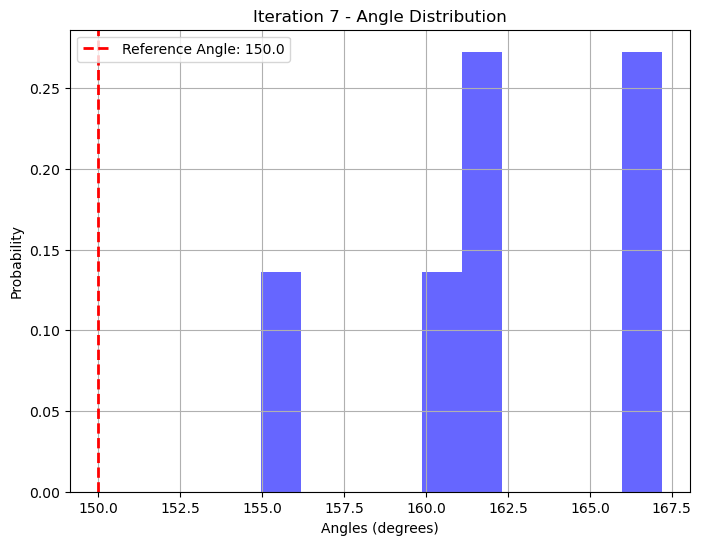

In [32]:
iteration = i + 1
plot_histogram([angle for _, angle in angles], desired_angle, iteration)


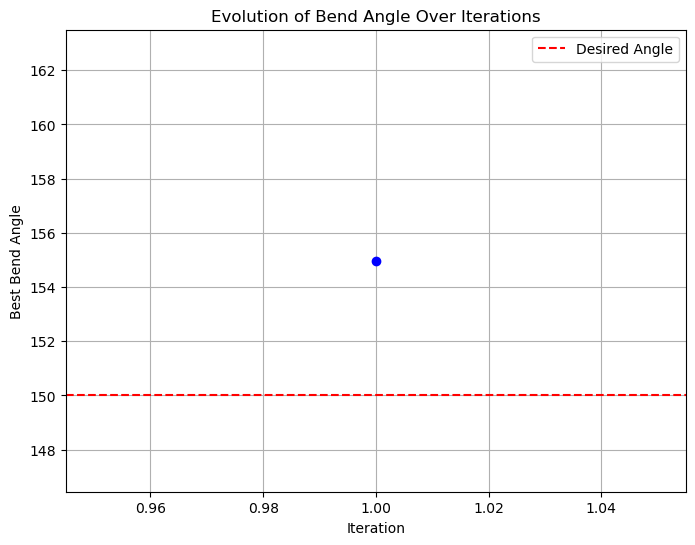

In [33]:
plot_angle_evolution(angle_history, desired_angle)

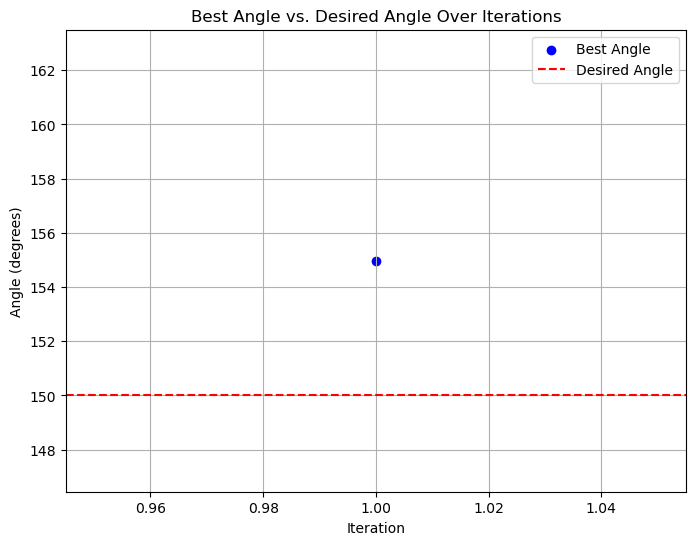

In [34]:
plot_best_vs_desired_angle(angle_history, desired_angle)